In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mousepath = "Resources/mouse_drug_data.csv"
clinicalpath = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.DataFrame(pd.read_csv(mousepath))
clinical_df = pd.DataFrame(pd.read_csv(clinicalpath))

# Combine the data into a single dataset

merged = pd.merge(mouse_df,clinical_df)
merged.head(5)
# Display the data table for preview



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
mean_tum = merged.groupby(['Drug','Timepoint']).mean().reset_index()
mean_tum = mean_tum.iloc[:,:3]
mean_tum

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

std_tum = merged.groupby(['Drug','Timepoint']).std().reset_index()
std_tum = std_tum.iloc[:,0:3]
std_tum


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915
...,...,...,...
95,Zoniferol,25,2.410052
96,Zoniferol,30,3.098552
97,Zoniferol,35,3.297993
98,Zoniferol,40,3.736102


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean =  pd.pivot_table(mean_tum, values='Tumor Volume (mm3)', index=['Timepoint'],columns=['Drug'], aggfunc=np.mean)
std = pd.pivot_table(std_tum, values='Tumor Volume (mm3)', index=['Timepoint'],columns=['Drug'], aggfunc=np.mean)
# Preview that Reformatting worked
print(mean.iloc[:,0:4])
print(std.iloc[:,0:4])


Drug       Capomulin   Ceftamin  Infubinol   Ketapril
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          44.266086  46.503051  47.062001  47.389175
10         43.084291  48.285125  49.403909  49.582269
15         42.064317  50.094055  51.296397  52.399974
20         40.716325  52.157049  53.197691  54.920935
25         39.939528  54.287674  55.715252  57.678982
30         38.769339  56.769517  58.299397  60.994507
35         37.816839  58.827548  60.742461  63.371686
40         36.958001  61.467895  63.162824  66.068580
45         36.236114  64.132421  65.755562  70.662958
Drug       Capomulin  Ceftamin  Infubinol  Ketapril
Timepoint                                          
0           0.000000  0.000000   0.000000  0.000000
5           2.242964  0.753856   1.175512  1.270025
10          3.513422  1.056070   1.293872  1.676454
15          4.108369  1.447385   1.639210  2.529329
20          4.362915  1.525155   2.12967

In [5]:
mean.index


Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

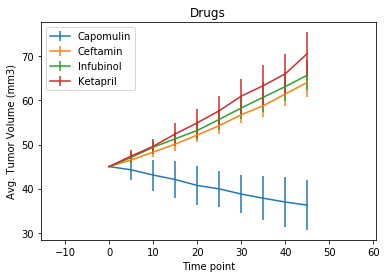

In [6]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
ax.errorbar(mean.index, mean.iloc[:,0],std.iloc[:,0],label='Capomulin')
ax.errorbar(mean.index, mean.iloc[:,1],std.iloc[:,1],label='Ceftamin')
ax.errorbar(mean.index, mean.iloc[:,2],std.iloc[:,2],label='Infubinol')
ax.errorbar(mean.index, mean.iloc[:,3],std.iloc[:,3],label='Ketapril')
ax.axis('equal')
leg = ax.legend()

# Add title and axis names
plt.title('Drugs')
plt.xlabel('Time point')
plt.ylabel('Avg. Tumor Volume (mm3)')


plt.show()


# Save the Figure



In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


mean_met = merged.groupby(['Drug','Timepoint']).mean().reset_index()
mean_met.columns

mean_met = mean_met[['Drug', 'Timepoint', 'Metastatic Sites']]
mean_met

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

std_met = merged.groupby(['Drug','Timepoint']).std().reset_index()
std_met = std_met[['Drug', 'Timepoint', 'Metastatic Sites']]
std_met



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.374166
2,Capomulin,10,0.627163
3,Capomulin,15,0.646899
4,Capomulin,20,0.775107
...,...,...,...
95,Zoniferol,25,0.946485
96,Zoniferol,30,0.961150
97,Zoniferol,35,1.069045
98,Zoniferol,40,1.121714


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

mean_met =  pd.pivot_table(mean_met, values='Metastatic Sites', index=['Timepoint'],columns=['Drug'], aggfunc=np.mean)
std_met = pd.pivot_table(std_met, values='Metastatic Sites', index=['Timepoint'],columns=['Drug'], aggfunc=np.mean)

print(mean.iloc[:,0:4])
print(std.iloc[:,0:4])


Drug       Capomulin   Ceftamin  Infubinol   Ketapril
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          44.266086  46.503051  47.062001  47.389175
10         43.084291  48.285125  49.403909  49.582269
15         42.064317  50.094055  51.296397  52.399974
20         40.716325  52.157049  53.197691  54.920935
25         39.939528  54.287674  55.715252  57.678982
30         38.769339  56.769517  58.299397  60.994507
35         37.816839  58.827548  60.742461  63.371686
40         36.958001  61.467895  63.162824  66.068580
45         36.236114  64.132421  65.755562  70.662958
Drug       Capomulin  Ceftamin  Infubinol  Ketapril
Timepoint                                          
0           0.000000  0.000000   0.000000  0.000000
5           2.242964  0.753856   1.175512  1.270025
10          3.513422  1.056070   1.293872  1.676454
15          4.108369  1.447385   1.639210  2.529329
20          4.362915  1.525155   2.12967

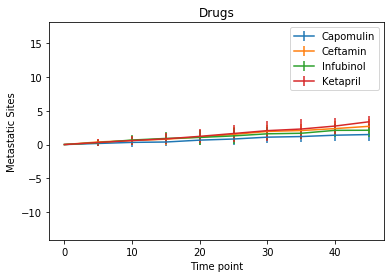

In [11]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

fig, ax = plt.subplots()
ax.errorbar(mean_met.index, mean_met.iloc[:,0],std_met.iloc[:,0],label='Capomulin')
ax.errorbar(mean_met.index, mean_met.iloc[:,1],std_met.iloc[:,1],label='Ceftamin')
ax.errorbar(mean_met.index, mean_met.iloc[:,2],std_met.iloc[:,2],label='Infubinol')
ax.errorbar(mean_met.index, mean_met.iloc[:,3],std_met.iloc[:,3],label='Ketapril')
ax.axis('equal')
leg = ax.legend()

# Add title and axis names
plt.title('Drugs')
plt.xlabel('Time point')
plt.ylabel('Metastatic Sites')


plt.show()


# Save the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

#mouse_count = merged.groupby(['Drug','Timepoint']).size().reset_index()
mouse_count = merged.groupby(['Drug','Timepoint']).agg({"Tumor Volume (mm3)": np.mean, "Mouse ID": pd.Series.nunique})
mouse_count['Mouse ID'].max()


25

In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

mouse =  pd.pivot_table(mouse_count, values='Mouse ID', index=['Timepoint'],columns=['Drug'], aggfunc=np.sum)

print(mouse.iloc[:,0:4])

Drug       Capomulin  Ceftamin  Infubinol  Ketapril
Timepoint                                          
0                 25        25         25        25
5                 25        21         25        23
10                25        20         21        22
15                24        19         21        19
20                23        18         20        19
25                22        18         18        19
30                22        16         17        18
35                22        14         12        17
40                21        14         10        15
45                21        13          9        11


In [14]:
mouse.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

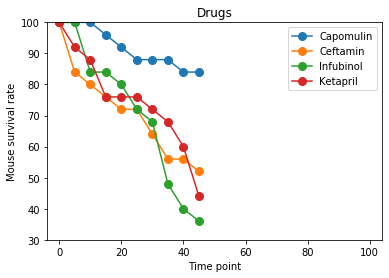

In [15]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure

fig, ax = plt.subplots()
ax.plot(mouse.index, mouse.iloc[:,0]/mouse_count['Mouse ID'].max()*100,label='Capomulin',marker='o',markersize=8)
ax.plot(mouse.index, mouse.iloc[:,1]/mouse_count['Mouse ID'].max()*100,label='Ceftamin',marker='o',markersize=8)
ax.plot(mouse.index, mouse.iloc[:,2]/mouse_count['Mouse ID'].max()*100,label='Infubinol',marker='o',markersize=8)
ax.plot(mouse.index, mouse.iloc[:,3]/mouse_count['Mouse ID'].max()*100,label='Ketapril',marker='o',markersize=8)
ax.axis('equal')
leg = ax.legend()

# Add title and axis names
plt.title('Drugs')
plt.xlabel('Time point')
plt.ylabel('Mouse survival rate')
plt.ylim(30, 100)
plt.xlim(0,100)

plt.show()



## Summary Bar Graph

In [62]:
# Calculate the percent changes for each drug

# Display the data to confirm
mean.reset_index()

# Store all Relevant Percent Changes into a Tuple

change = (((mean.iloc[9,:])/(mean.iloc[1,:])-1)*100)
change_tuple = tuple(zip(change.index,change))
type(change_tuple)


-18.14023616326469

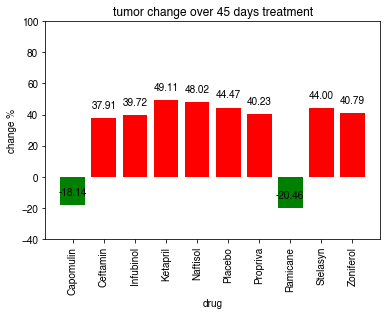

In [93]:

# Save the Figure
x = np.arange(len(change))
y = change
plt.bar(x, y,color=('g','r','r','r','r','r','r','g','r','r'))
label = change.index

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.title('tumor change over 45 days treatment')
plt.xlabel('drug')
plt.ylabel('change %')
plt.xticks(x, label,rotation=90)
plt.ylim(-40, 100)

for x1,y1 in zip(x,y):

    label = "{:.2f}".format(y1)

    plt.annotate(label, # this is the text
                 (x1,y1), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


    



# Show the Figure
plt.show()

You must include a written description of three observable trends based on the data.

1. Ramicane seesm to be the drug that reduces the most the tumor volume during a 45 days trial
2. Capomulin shows the highest survival rate for mouses in trial
3. Only two drugs pass the trial achieving a decrease in the total volume of the tumor, Capomulin and Ramicane

p.s. Charting in Python is like managing big data in Excel... you can handle it but with severe limitations